In [2]:
!wget -r --user = livre --password = python_bro_remy \
http://maths.bro.free.fr/data/data.html

--2022-12-11 01:15:23--  http://livre/
Resolving livre (livre)... failed: Name or service not known.
wget: unable to resolve host address ‘livre’
--2022-12-11 01:15:23--  http://python_bro_remy/
Resolving python_bro_remy (python_bro_remy)... failed: Name or service not known.
wget: unable to resolve host address ‘python_bro_remy’
--2022-12-11 01:15:23--  http://maths.bro.free.fr/data/data.html
Resolving maths.bro.free.fr (maths.bro.free.fr)... 212.27.63.112
Connecting to maths.bro.free.fr (maths.bro.free.fr)|212.27.63.112|:80... connected.
HTTP request sent, awaiting response... 401 Authorization Required
Authentication selected: Basic realm="Acces Restreint"
Connecting to maths.bro.free.fr (maths.bro.free.fr)|212.27.63.112|:80... connected.
HTTP request sent, awaiting response... 401 Authorization Required

Username/Password Authentication Failed.


In [35]:
import pandas as pa
T = pa.read_csv('the.csv')
T.head()

,tout_moment,variete,comment,sucre,forme,type,sexe,CSP,sportif,age,frequence,plus_pour_la_sante
0,0,noir,pur,1,sachet,inconnu,H,cadre moyen,1,39,1/jour,1
1,0,noir,lait,0,sachet,variable,F,cadre moyen,1,45,1/jour,1
2,0,parfumé,pur,0,sachet,variable,F,autre actif,1,47,+ de 2/jour,1
3,0,parfumé,pur,1,sachet,variable,H,étudiant,0,23,1/jour,1
4,1,parfumé,pur,0,sachet,variable,H,employé,1,48,+ de 2/jour,0


In [4]:
type(T)
len(T)

300

In [62]:
#selectionner une valeur dans un tableau on met d'abord l'index puis le nom de la colonne
T.loc[3,'sucre']

1

In [6]:
#effectuer une recherche dans un tableau 
T1 = T.query('sexe == "F" and age >= 30')
T2 = T.query('age == 90')
T3 = T.query('comment == "pur" and sexe == "F"')
T4 = T.query('sexe == "F"')

In [28]:
T4.head(len(T))

,tout_moment,variete,comment,sucre,forme,type,sexe,CSP,sportif,age,frequence,plus_pour_la_sante
1,0,noir,lait,0,sachet,variable,F,cadre moyen,1,45,1/jour,1
2,0,parfumé,pur,0,sachet,variable,F,autre actif,1,47,+ de 2/jour,1
7,0,noir,lait,0,sachet,variable,F,cadre moyen,1,36,1 à 2/sem,1
17,0,parfumé,pur,0,sachet,variable,F,non actif,1,72,+ de 2/jour,1
18,0,noir,pur,0,sachet,marque_connue,F,non actif,0,73,+ de 2/jour,0
...,...,...,...,...,...,...,...,...,...,...,...,...
293,1,parfumé,lait,1,sachet,inconnu,F,autre actif,1,32,1/jour,1
294,0,parfumé,pur,0,sachet+vrac,variable,F,cadre sup,1,50,+ de 2/jour,1
295,0,vert,lait,0,sachet,variable,F,non actif,1,68,1 à 2/sem,1
297,1,parfumé,pur,1,sachet,variable,F,autre actif,0,36,1 à 2/sem,0


In [37]:
T3.head()
T4.tail()

,tout_moment,variete,comment,sucre,forme,type,sexe,CSP,sportif,age,frequence,plus_pour_la_sante
293,1,parfumé,lait,1,sachet,inconnu,F,autre actif,1,32,1/jour,1
294,0,parfumé,pur,0,sachet+vrac,variable,F,cadre sup,1,50,+ de 2/jour,1
295,0,vert,lait,0,sachet,variable,F,non actif,1,68,1 à 2/sem,1
297,1,parfumé,pur,1,sachet,variable,F,autre actif,0,36,1 à 2/sem,0
298,1,noir,citron,1,sachet,haude_gamme,F,non actif,0,73,+ de 2/jour,0


In [7]:
T2

,tout_moment,variete,comment,sucre,forme,type,sexe,CSP,sportif,age,frequence,plus_pour_la_sante
270,0,noir,pur,1,vrac,variable,F,non actif,0,90,+ de 2/jour,0


In [20]:
T['sexe']

0      H
1      F
2      F
3      H
4      H
      ..
295    F
296    H
297    F
298    F
299    H
Name: sexe, Length: 300, dtype: object

In [5]:
#croiser les tables sexes et comment 
E = pa.crosstab(T['sexe'],T['comment'])
E

comment,autre,citron,lait,pur
sexe,,,,
F,6,19,32,121
H,3,14,31,74


In [24]:
#prendre la transposée 
E.T

sexe,F,H
comment,,
autre,6,3
citron,19,14
lait,32,31
pur,121,74


In [25]:
E2 = pa.crosstab(T['comment'],T['sexe'])
E2

sexe,F,H
comment,,
autre,6,3
citron,19,14
lait,32,31
pur,121,74


In [32]:
#ajout des totaux, le margins ne marche que si il n'y a que des nombres 
M = pa.crosstab(T['sexe'],T['comment'], margins = True)
M

comment,autre,citron,lait,pur,All
sexe,,,,,
F,6,19,32,121,178
H,3,14,31,74,122
All,9,33,63,195,300


In [33]:
#calcul avec python des fréquences
#attention ca ne marche pas si on utilise la transposé de M car il n'aura plus les mêmes colonnes
Freq = M['lait']/M['All']
Freq

sexe
F      0.179775
H      0.254098
All    0.210000
dtype: float64

In [60]:
M['pur']

sexe
F      121
H       74
All    195
Name: pur, dtype: int64

Data Visualisation 

In [38]:
import pylab as pl

sexe,F,H
comment,,
autre,6,3
citron,19,14
lait,32,31
pur,121,74


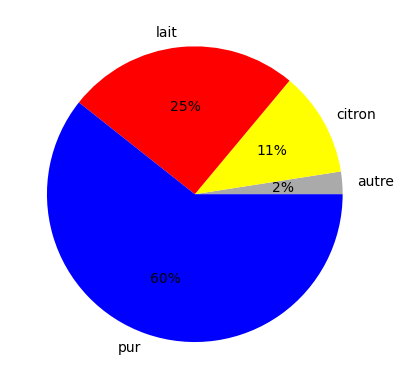

In [57]:
pl.pie(E2['H'],
        autopct = lambda x : str(int(x)) + '%', 
        colors = ['#AAA','yellow', 'red', 'blue'], 
        labels = E.T.index)
E2

In [46]:
print(E.T.index, E.index)


Index(['autre', 'citron', 'lait', 'pur'], dtype='object', name='comment') Index(['F', 'H'], dtype='object', name='sexe')


In [3]:
T.describe()

,tout_moment,sucre,sportif,age,plus_pour_la_sante
count,300.000000,300.000000,300.000000,300.000000,300.000000
mean,0.343333,0.483333,0.596667,37.053333,0.700000
std,0.475615,0.500557,0.491386,16.870463,0.459023
min,0.000000,0.000000,0.000000,15.000000,0.000000
25%,0.000000,0.000000,0.000000,23.000000,0.000000
50%,0.000000,0.000000,1.000000,32.000000,1.000000
75%,1.000000,1.000000,1.000000,48.000000,1.000000
max,1.000000,1.000000,1.000000,90.000000,1.000000


array([[<AxesSubplot: ylabel='autre'>, <AxesSubplot: ylabel='citron'>,
        <AxesSubplot: ylabel='lait'>, <AxesSubplot: ylabel='pur'>]],
      dtype=object)

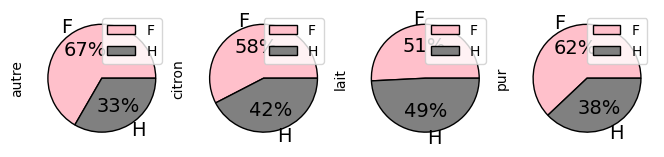

In [29]:
E.plot.pie(subplots= True,
           legend = None,
           layout = (1,4),
           autopct = lambda x : str(round(x))+ '%',
           figsize = (8,3),
           colors = ['pink','gray'],
           wedgeprops = {'edgecolor':'black'},
           fontsize = 14
           )

array([[<AxesSubplot: ylabel='F'>, <AxesSubplot: ylabel='H'>]],
      dtype=object)

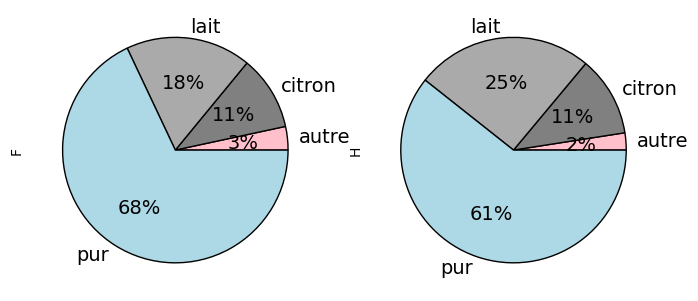

In [34]:
#pour prendre la transposée pour avoir les évènements conditionelles inverses
E.T.plot.pie(subplots= True,
           legend = None,
           layout = (1,2),
           autopct = lambda x : str(round(x))+ '%',
           figsize = (8,4),
           colors = ['pink','gray','#AAA','lightblue'],
           wedgeprops = {'edgecolor':'black'},
           fontsize = 14
           )

In [43]:
T.groupby('sexe').sum()

/tmp/ipykernel_5426/635305515.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  T.groupby('sexe').sum()


,tout_moment,sucre,sportif,age,plus_pour_la_sante
sexe,,,,,
F,63,71,97,6649,127
H,40,74,82,4467,83


In [69]:
T.groupby('sexe').describe()

tout_moment                                               sucre  \
           count      mean       std  min  25%  50%  75%  max  count   
sexe                                                                   
F          178.0  0.353933  0.479537  0.0  0.0  0.0  1.0  1.0  178.0   
H          122.0  0.327869  0.471373  0.0  0.0  0.0  1.0  1.0  122.0   

                ...   age       plus_pour_la_sante                           \
          mean  ...   75%   max              count      mean       std  min   
sexe            ...                                                           
F     0.398876  ...  49.0  90.0              178.0  0.713483  0.453409  0.0   
H     0.606557  ...  48.0  78.0              122.0  0.680328  0.468273  0.0   

                          
      25%  50%  75%  max  
sexe                      
F     0.0  1.0  1.0  1.0  
H     0.0  1.0  1.0  1.0  

[2 rows x 40 columns]

In [45]:
T.groupby(['sexe','sucre']).mean()
#sachant l'intersection de deux évènements, calcul de la proba condi

/tmp/ipykernel_5426/1732999947.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  T.groupby(['sexe','sucre']).mean()


tout_moment   sportif        age  plus_pour_la_sante
sexe sucre                                                      
F    0         0.336449  0.551402  40.757009            0.757009
     1         0.380282  0.535211  32.225352            0.647887
H    0         0.312500  0.645833  41.145833            0.687500
     1         0.337838  0.689189  33.675676            0.675676

In [50]:
P = pa.read_csv('prix_m2_france.csv')
S= P.query('pop>200')

In [52]:
S.describe()


,reg,pop,ventes,prix
count,26083.000000,2.608300e+04,22432.000000,22432.000000
mean,52.356171,2.569136e+03,29.005706,1702.510209
std,24.479502,1.776834e+04,140.593311,875.544853
min,11.000000,2.010000e+02,1.000000,351.000000
25%,28.000000,3.690000e+02,3.000000,1157.000000
50%,44.000000,6.920000e+02,7.000000,1502.000000
75%,76.000000,1.586500e+03,17.000000,1999.000000
max,94.000000,2.190327e+06,7411.000000,11965.000000


In [53]:
S['prix'].describe()

count    22432.000000
mean      1702.510209
std        875.544853
min        351.000000
25%       1157.000000
50%       1502.000000
75%       1999.000000
max      11965.000000
Name: prix, dtype: float64

In [62]:
len(P.query('prix > 10000')),P.query('prix > 10000')
P.query('prix == 351')

,com,dep,reg,nom,pop,ventes,prix
25922,76460,76,28,NESLE NORMANDEUSE,568,1.0,351.0
26536,8415,8,44,SERY,360,1.0,351.0
34347,21042,21,27,BAGNOT,160,1.0,351.0


<AxesSubplot: xlabel='prix'>

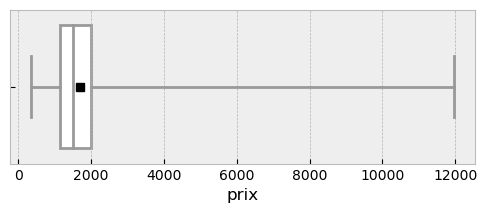

In [64]:
#boite à moustache 
import pylab as pl
pl.style.use('bmh')

import seaborn as sn

pl.figure(figsize = (6,2))
sn.boxplot(x = 'prix',
          data = S, 
          showmeans = True, 
          whis= [0,100],
          color = 'white',
          meanprops = {'marker' : 's',
                      'markerfacecolor': 'black',
                      'markeredgecolor' : 'black'}
          )

In [87]:
#utilisation du groupby
import numpy as np
A = P.groupby('reg')['prix'].describe()
p1 = np.max(A['max'])
p1

14803.0

In [88]:
A.query('max == 14803')

,count,mean,std,min,25%,50%,75%,max
reg,,,,,,,,
27,2594.0,1323.654588,621.842159,351.0,951.0,1225.0,1590.75,14803.0


<AxesSubplot: xlabel='reg', ylabel='prix'>

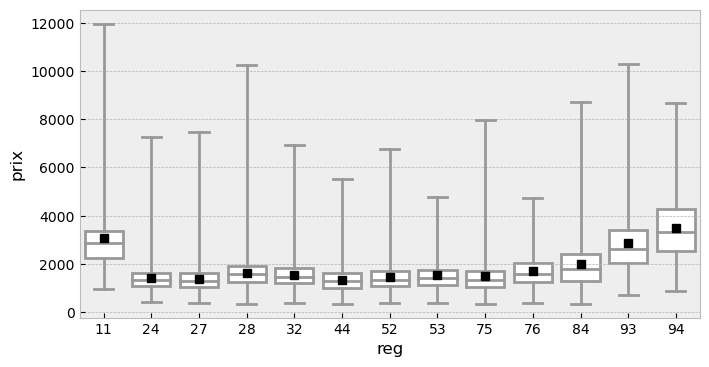

In [91]:
pl.figure(figsize = (8,4))
sn.boxplot(x = 'reg',
           y = 'prix',
          data = S, 
          showmeans = True, 
          whis= [0,100],
          color = 'white',
          meanprops = {'marker' : 's',
                      'markerfacecolor': 'black',
                      'markeredgecolor' : 'black'}
          )

In [94]:
#création d'une colonne à S d'un nouveau KPI qui  vaut 0 si la ville est petite 1 si grande critère >20000
S['grande'] = S['pop'].apply(lambda x :1
                            if x >= 20000 else 0)

/tmp/ipykernel_5426/881341476.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  S['grande'] = S['pop'].apply(lambda x :1


<AxesSubplot: xlabel='reg', ylabel='prix'>

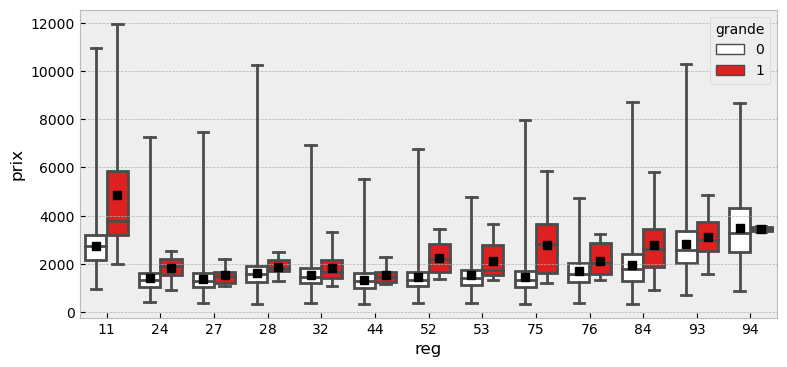

In [98]:
pl.figure(figsize = (9,4))
sn.boxplot(x = 'reg',
           y = 'prix',
          data = S, 
          hue = 'grande',
          showmeans = True, 
          whis= [0,100],
          palette = ['white','red'], 
          meanprops = {'marker' : 's',
                      'markerfacecolor': 'black',
                      'markeredgecolor' : 'black'}
          )